In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.corr()['price']

bath       0.456345
balcony    0.120355
price      1.000000
Name: price, dtype: float64

In [5]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
df.drop(['area_type','availability','society'],axis=1,inplace=True)

In [8]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [9]:
df.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [10]:
df.drop('balcony',axis=1,inplace=True)

In [11]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df['bhk'] = df['size'].apply(lambda x: str(x).split(' ')[0])
df.bhk.unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', 'nan', '27',
       '10', '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [13]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df['bhk'].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', 'nan', '27',
       '10', '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df[~df['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,NaN,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,NaN,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2


In [17]:
def convert_sq_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
convert_sq_to_num('21335')# took the number is a floating value

21335.0

In [19]:
convert_sq_to_num('9786-7868') # took the average of both the values seperated by'-'

8827.0

In [20]:
housing=df.copy() #copy() function will copy all the features of 'df' dataframe into a new data frame 'housing'

In [21]:
housing['total_sqft']=housing['total_sqft'].apply(convert_sq_to_num) # applying our function convert_sq_to_num on our dataframe

In [22]:
housing.head() # Here we got our new column total_sqft with perfect floating values and we removed the ranges.

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [23]:
housing_2=housing.copy()

In [24]:
housing_2.iloc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [25]:
housing_2['price_per_sqft']=(housing_2['price'])*100000/(housing_2['total_sqft'])

In [26]:
housing_2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [27]:
len(housing_2.location.unique())

1306

In [28]:
housing_2['location']=housing_2['location'].apply(lambda x:str(x).strip() )

In [29]:
housing_2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [30]:
location_stats=housing_2.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [31]:
location_stats

location
Whitefield               541
Sarjapur  Road           399
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1295, dtype: int64

In [32]:
location_stats_less_than_10=location_stats[location_stats<10]

In [33]:
housing_2['location']=housing_2['location'].apply(lambda x:'other' if x in location_stats_less_than_10 else x)

In [34]:
housing_2.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [35]:
housing_2['bhk']=housing_2['bhk'].apply(lambda x: float(x))

In [36]:
housing_2['total_sqft']=housing_2['total_sqft'].apply(lambda x: float(x))

In [37]:
housing_2[housing_2.total_sqft/housing_2.bhk<300].head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6.0,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8.0,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6.0,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8.0,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3.0,20000.000000


In [38]:
housing_2.shape

(13320, 7)

In [39]:
housing_data=housing_2[~(housing_2.total_sqft/housing_2.bhk<300)]

In [40]:
housing_data.shape

(12576, 7)

In [41]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(housing_data)
df7.shape

(10282, 7)

<AxesSubplot:xlabel='price_per_sqft', ylabel='total_sqft'>

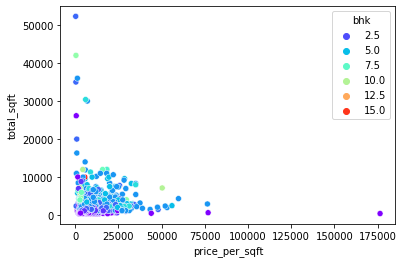

In [42]:
sns.scatterplot(data=housing_data,x='price_per_sqft',y='total_sqft',hue='bhk',palette='rainbow')

In [43]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape


(7403, 7)

<Figure size 1080x1080 with 0 Axes>

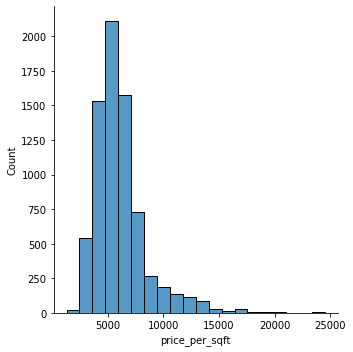

In [44]:
plt.figure(figsize=(15,15))
sns.displot(df8['price_per_sqft'],bins=20)

<AxesSubplot:xlabel='total_sqft', ylabel='total_sqft'>

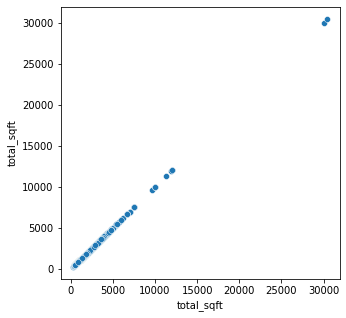

In [45]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='total_sqft',y='total_sqft',data=df8)

In [46]:
df8['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., 14., nan,  7.,  9., 12., 16.,
       13.])

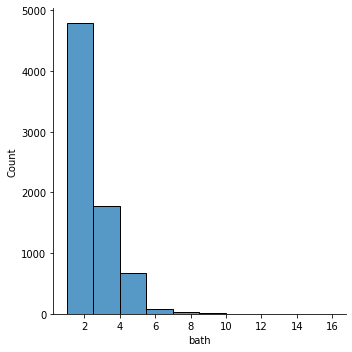

In [47]:
sns.displot(df8['bath'],bins=10)

In [48]:
df[df['bath']>10].head()

,location,size,total_sqft,bath,price,bhk
938,5th Phase JP Nagar,9 Bedroom,1260,11.0,290.0,9
1078,BTM 1st Stage,9 Bedroom,3300,14.0,500.0,9
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
1768,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,170.0,11
1953,KR Puram,8 Bedroom,1200,12.0,110.0,8


In [49]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7287, 7)

In [50]:
df9.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4.0,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3.0,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3.0,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3.0,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2.0,11983.805668


In [51]:
df10=df9.drop(['price_per_sqft','size'],axis=1)

In [52]:
df10

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0
...,...,...,...,...,...
10273,other,1200.0,2.0,70.0,2.0
10274,other,1800.0,1.0,200.0,1.0
10277,other,1353.0,2.0,110.0,2.0
10278,other,812.0,1.0,26.0,1.0


In [53]:
dummise=pd.get_dummies(df10.location)

In [54]:
dummise

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
df11=pd.concat([df10,dummise.drop(['other'],axis=1)],axis=1)

In [56]:
df11

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10273,other,1200.0,2.0,70.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10274,other,1800.0,1.0,200.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10277,other,1353.0,2.0,110.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10278,other,812.0,1.0,26.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df12=df11.drop('location',axis=1)

In [58]:
df12

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10273,1200.0,2.0,70.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10274,1800.0,1.0,200.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10277,1353.0,2.0,110.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10278,812.0,1.0,26.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
X=df12.drop('price',axis=1)

In [60]:
y=df12['price']

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
model=LinearRegression()

In [65]:
model.fit(X_train,y_train)

LinearRegression()

In [66]:
predictions=model.predict(X_test)

In [67]:
print(predictions)

[ 83.46208038 110.1236107   95.9489681  ...  86.56791502  29.61610784
  83.71989598]


In [68]:
pred=pd.DataFrame(predictions,y_test,columns=['prediction'])

In [69]:
pred

,prediction
price,
80.00,83.462080
110.00,110.123611
105.00,95.948968
75.97,85.789469
52.50,46.078907
...,...
55.00,64.106627
300.00,316.200043
100.00,86.567915


In [70]:
model.score(X_test,y_test)

0.8296988362548545

In [71]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.85888344, 0.89048387, 0.82849156, 0.86202475, 0.84688142])

In [72]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [73]:
predict_price('Indira Nagar',1000, 3, 3)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


176.68564063674944

In [74]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model,f)

In [75]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))